In [200]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

%matplotlib inline

In [201]:
# Generate data : features take from normal distribution; Different classes have different mean
np.random.seed(42)
f_class_x = np.random.normal(size=(200,2), loc=0)
f_class_y = np.zeros(shape=200)
s_class_x = np.random.normal(size=(200,2), loc=1.5)
s_class_y = np.ones(shape=200)

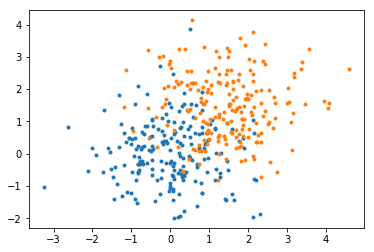

In [202]:
# Visualize
plt.plot(f_class_x[:, 0], f_class_x[:,1], ".");
plt.plot(s_class_x[:,0], s_class_x[:, 1], ".");

In [203]:
# Create dataset
X = np.concatenate([f_class_x, s_class_x])
y = np.concatenate([f_class_y, s_class_y])

In [204]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [205]:
# Let's train decision tree
clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [206]:
print("Train accuracy {}".format(accuracy_score(y_train, clf.predict(X_train))))
print("Test Accuracy {}".format(accuracy_score(y_test, clf.predict(X_test))))

Train accuracy 0.8357142857142857
Test Accuracy 0.875


In [207]:
import IPython.display
import pydotplus

from sklearn.externals.six import StringIO
def draw_tree_structure(clf, columns):
    dot_data=StringIO()
    tree.export_graphviz(clf, out_file=dot_data, feature_names=columns)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    t = IPython.display.Image(graph.create_png())
    IPython.display.display(t)

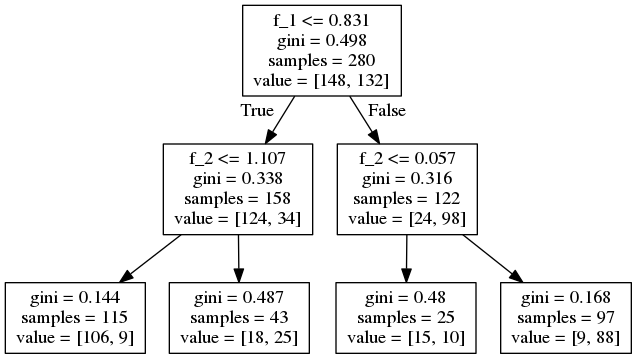

In [208]:
draw_tree_structure(clf, ["f_1", "f_2"])

In [209]:
def plot_surface(X,y,clf):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                 np.arange(y_min, y_max, 0.1))

    fig, ax = plt.subplots()
    z = clf.predict(np.c_[np.c_[xx.ravel(), yy.ravel()]])
    z = z.reshape(xx.shape);
    plt.contourf(xx, yy, z)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=pl.cm.Paired);

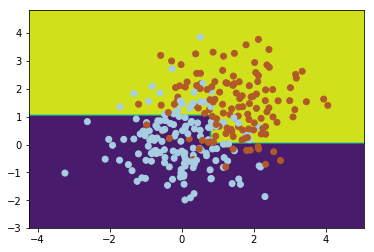

In [210]:
plot_surface(X_train, y_train, clf);

### Let's try to overfitting

In [211]:
clf = tree.DecisionTreeClassifier(max_depth=12)
clf.fit(X_train, y_train)

print("Train accuracy {}".format(accuracy_score(y_train, clf.predict(X_train))))
print("Test Accuracy {}".format(accuracy_score(y_test, clf.predict(X_test))))

Train accuracy 1.0
Test Accuracy 0.7833333333333333


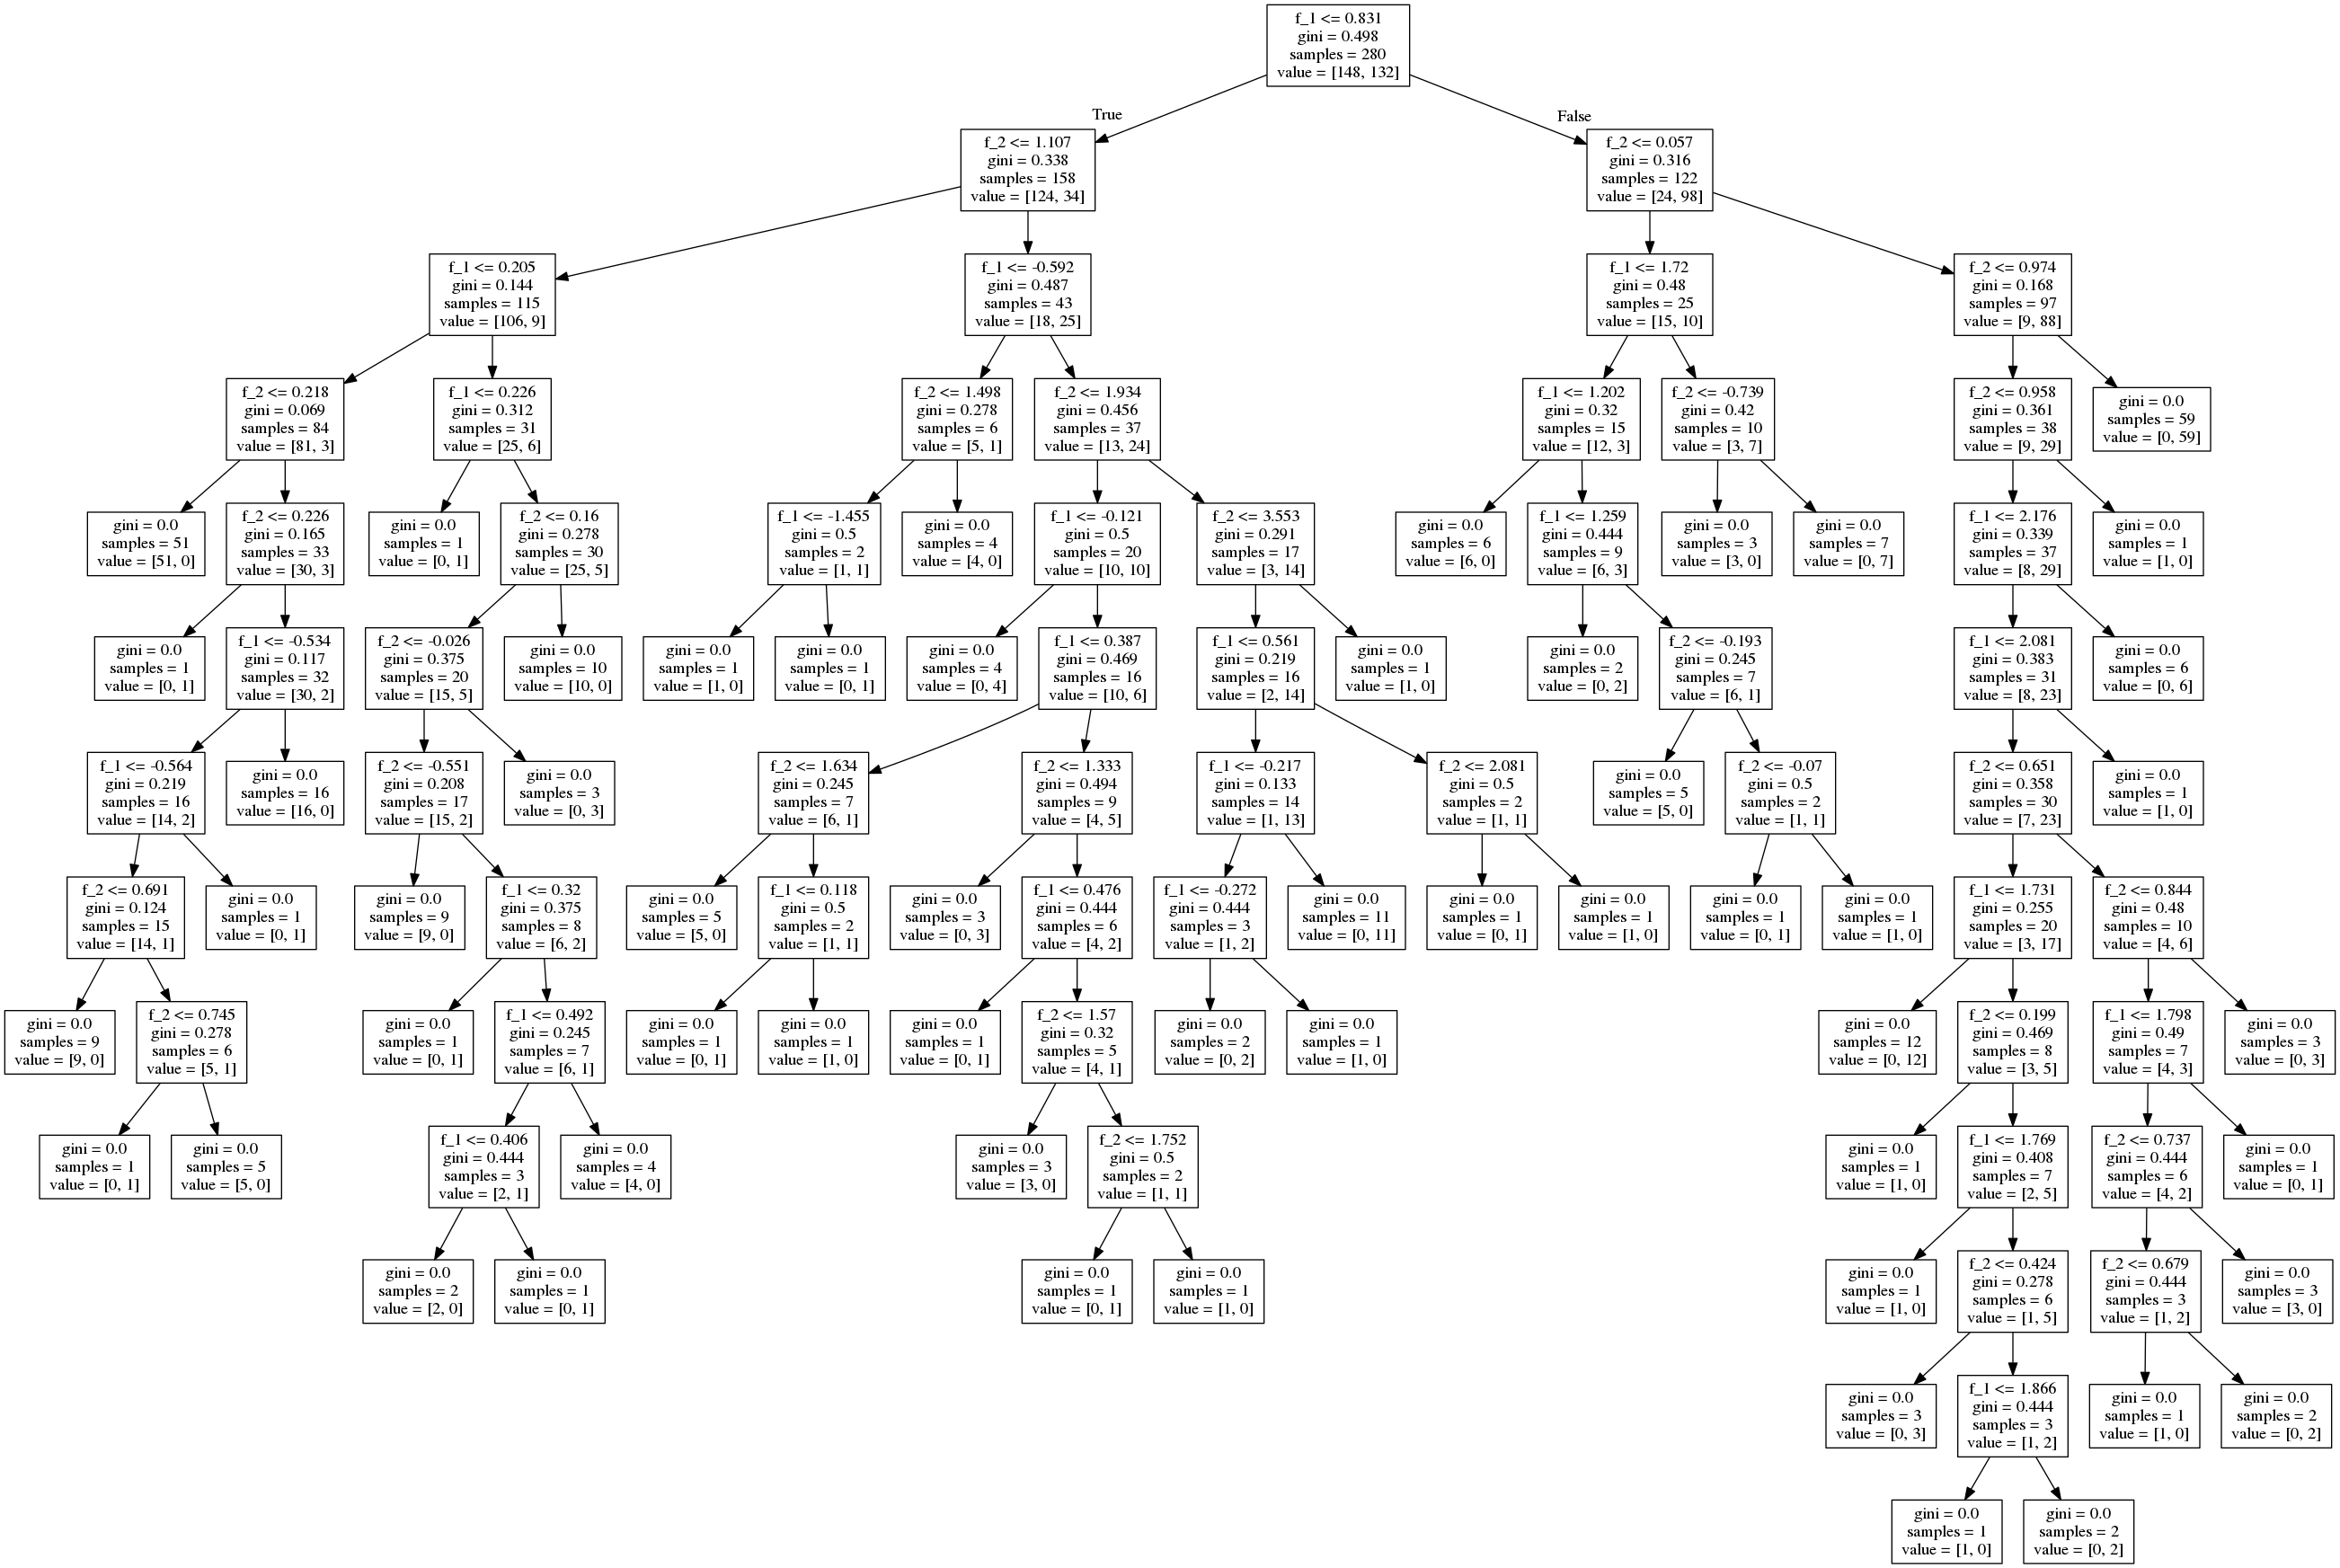

In [212]:
draw_tree_structure(clf, ["f_1", "f_2"])

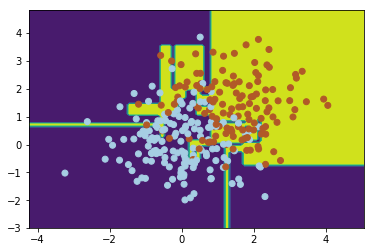

In [213]:
plot_surface(X_train, y_train, clf);

### Random Forest

In [217]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)

print("Test Accuracy {}".format(accuracy_score(y_train, rf.predict(X_train))))
print("Test Accuracy {}".format(accuracy_score(y_test, rf.predict(X_test))))

Test Accuracy 0.9964285714285714
Test Accuracy 0.8666666666666667


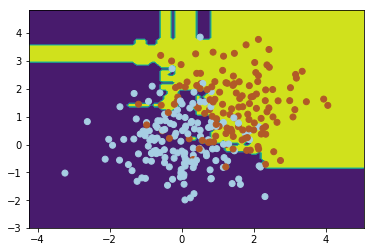

In [218]:
plot_surface(X_train, y_train, rf)

In [231]:
# Dependence of score of the number of etimators

n_estimators = range(10, 100, 10)
scores = []

for n_est in n_estimators:
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=5, min_samples_leaf=10)
    rf.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, rf.predict(X_test)))

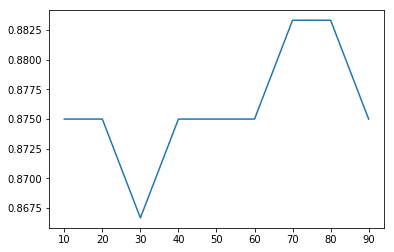

In [232]:
plt.plot(n_estimators, scores);